In [1]:
from os.path import join

import numpy as np
from numpy.linalg import svd

from scipy.io import loadmat
from sklearn.mixture import GaussianMixture

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
plt.rcParams['font.size'] = 18

In [2]:
dog_wave = loadmat(join('..', 'DATA', 'dogData_w.mat'))['dog_wave']
cat_wave = loadmat(join('..', 'DATA', 'catData_w.mat'))['cat_wave']
dog_cat = np.hstack([dog_wave, cat_wave])

U, S, VT = svd(dog_cat - dog_cat.mean(), full_matrices=False)
V = VT.T

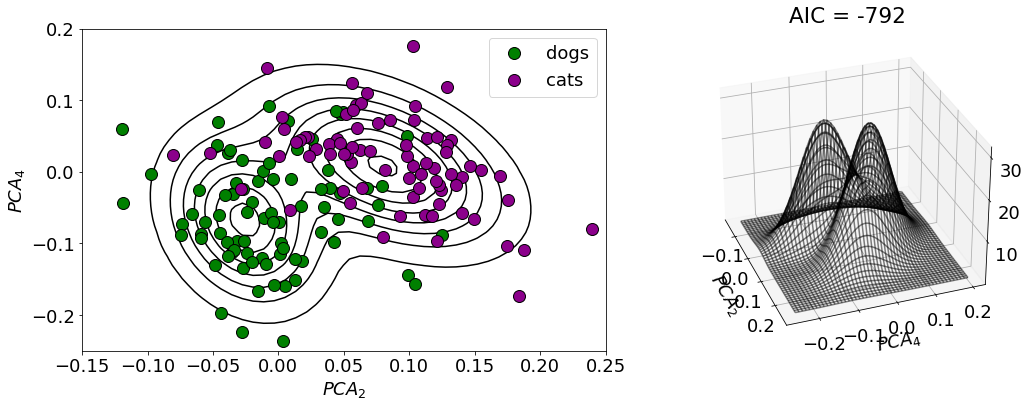

In [3]:
# Figure 5.17

dog_cat_v13 = V[:, [1, 3]]
GMModel = GaussianMixture(n_components=2).fit(dog_cat_v13)
aic = GMModel.aic(dog_cat_v13)

fig = plt.figure(figsize=(16, 6))
axs = [
    fig.add_subplot(1, 2, 1),
    fig.add_subplot(1, 2, 2, projection='3d')
]

axs[0].plot(V[:80, 1], V[:80, 3], 'o', markerfacecolor='green', markeredgecolor='black', markersize=12, label='dogs')
axs[0].plot(V[80:, 1], V[80:, 3], 'o', markerfacecolor='darkmagenta', markeredgecolor='black', markersize=12, label='cats')
axs[0].set_xlabel('$PCA_2$')
axs[0].set_ylabel('$PCA_4$')

x = np.linspace(-0.15, 0.25)
y = np.linspace(-0.25, 0.2)
X, Y = np.meshgrid(x, y)
XX = np.column_stack([X.ravel(), Y.ravel()])
Z = np.exp(
    GMModel.score_samples(XX)
).reshape(X.shape)

axs[0].contour(X, Y, Z, levels=range(3, 32, 4), colors='black', linestyles='solid')
axs[0].legend()

axs[1].plot_wireframe(X, Y, Z, color='black', alpha=0.5)
axs[1].view_init(30, -20)
axs[1].set_xlabel('$PCA_2$')
axs[1].set_ylabel('$PCA_4$')
axs[1].set_title(f'AIC = {aic:0.0f}')

plt.tight_layout();

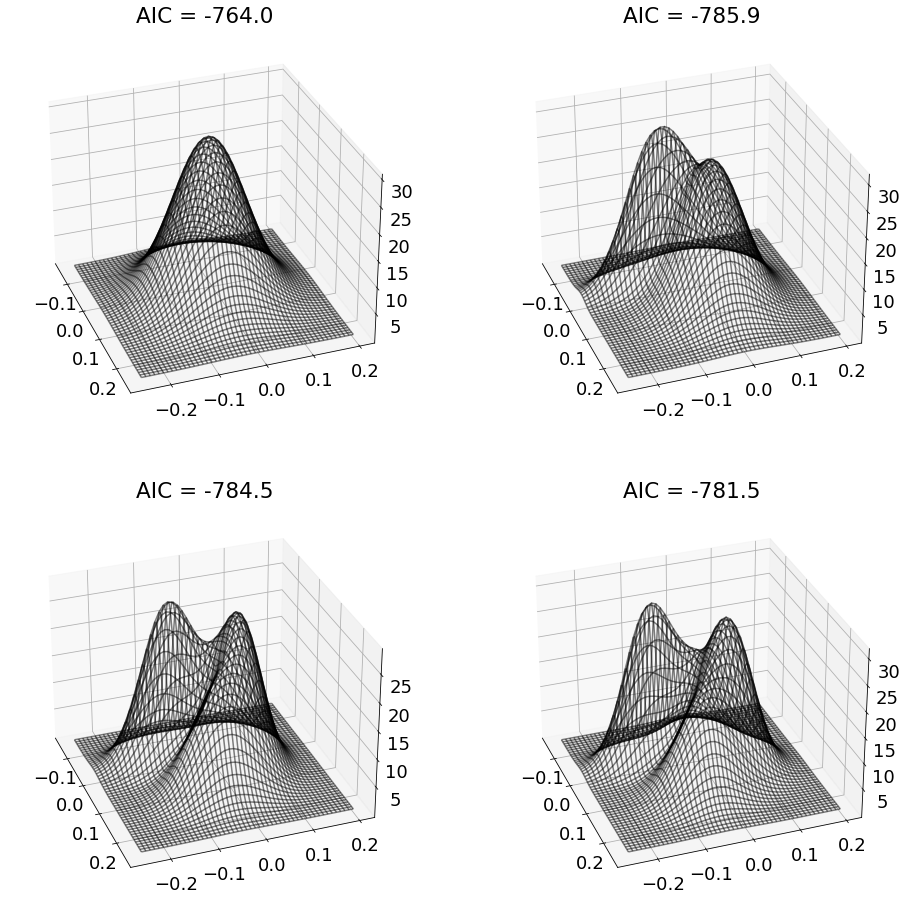

In [4]:
## AIC Scores
gm_models = [
    GaussianMixture(k+1, covariance_type='diag', max_iter=500).fit(dog_cat_v13)
    for k in range(4)
]

fig, axs = plt.subplots(2, 2, subplot_kw={'projection': '3d'}, figsize=(16, 16))
for ax, gm_model in zip(axs.flat, gm_models):
    Z = np.exp(gm_model.score_samples(XX)).reshape(X.shape)
    ax.plot_wireframe(X, Y, Z, color='black', alpha=0.5)
    aic = gm_model.aic(dog_cat_v13)
    ax.set_title(f'AIC = {aic:0.1f}')
    ax.view_init(30, -20)